In [1]:
# packages

import importlib_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from itertools import combinations

import os
os.chdir(os.path.abspath(''))

['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy']
matrix size: 330 by 9


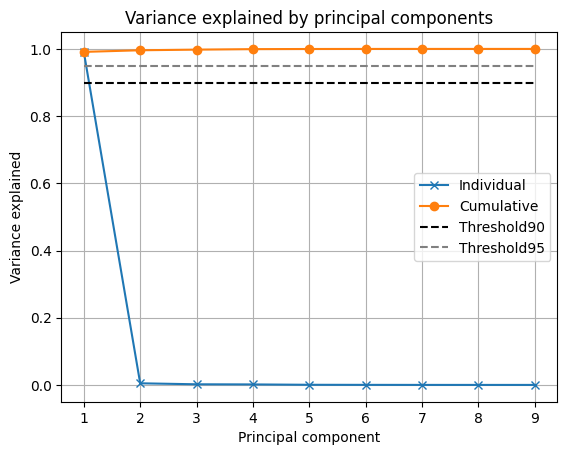

NameError: name 'C' is not defined

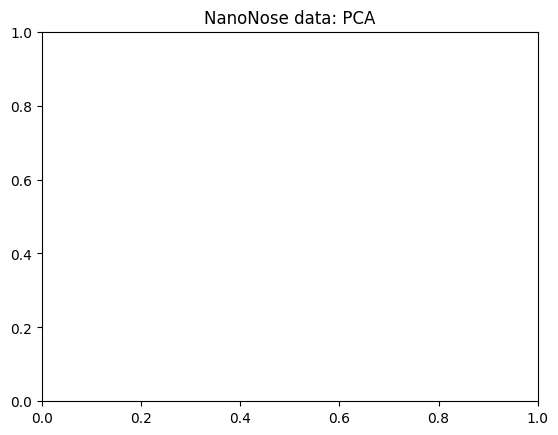

In [3]:
# simple matrix, no classes considered
# import data in matrix format


filename = 'data.csv'
df = pd.read_csv(filename)
df = df.drop(['ozone'], axis=1)
attributeNames = df.columns.values.tolist()
print(attributeNames)

M = len(attributeNames)
N = df.shape[0]

X = np.empty((N,M))
for i in range(len(attributeNames)):
    X[:,i] = np.array(df[attributeNames[i]])
print(f'matrix size: {N} by {M}')



# from exercise 2.1.3

Y = X - np.ones((N, 1)) * X.mean(axis=0)

U, S, Vh = svd(Y, full_matrices=False)

rho = (S * S) / (S * S).sum()

threshold = 0.9
threshold2 = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.plot([1, len(rho)], [threshold2, threshold2], color="gray", linestyle="--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold90","Threshold95"])
plt.grid()
plt.show()


# from ex2_1_4
V = Vh.T

Z = Y @ V

i = 0
j = 1

# Plot PCA of the data
f = plt.figure()
plt.title("NanoNose data: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()


In [45]:
# insert low - medium - high - veryhigh classes

filename = 'data.csv'
df = pd.read_csv(filename)
class_list = []
interval = [5, 15, 25]
for value in df['ozone']:
    if value <= interval[0]:
        name = 'low'
    elif value > interval[0] and value <= interval[1]:
        name = 'medium'
    elif value > interval[1] and value <= interval[2]:
        name = 'high'
    else:
        name = 'veryhigh'
    class_list.append(name)
class_list = np.array(class_list)
df['type'] = class_list

# remove ozone attribute
df = df.drop(['ozone'], axis=1)
#df = df.drop(['ibh'], axis=1)
#df = df.drop(['ibt'], axis=1)
#df = df.drop(['vis'], axis=1)



In [46]:
# with classes implemented
# import data in matrix format
length = 300
width = df.shape[1]-1

raw_data = df.values
cols = range(0, width)

X = raw_data[:length, cols]
X = X.astype(np.float64)

attributeNames = np.asarray(df.columns[cols])

classLabels = raw_data[:length, -1]
classNames = np.unique(classLabels)
classDict = dict(zip(classNames, range(len(classNames))))

y = np.array([classDict[value] for value in classLabels])

N = len(y)
M = len(attributeNames)
C = len(classNames)

print(f'matrix size: {N} by {M}')
print('classNames',classNames)
print('attributeNames',attributeNames)


matrix size: 300 by 9
classNames ['high' 'low' 'medium' 'veryhigh']
attributeNames ['vh' 'wind' 'humidity' 'temp' 'ibh' 'dpg' 'ibt' 'vis' 'doy']


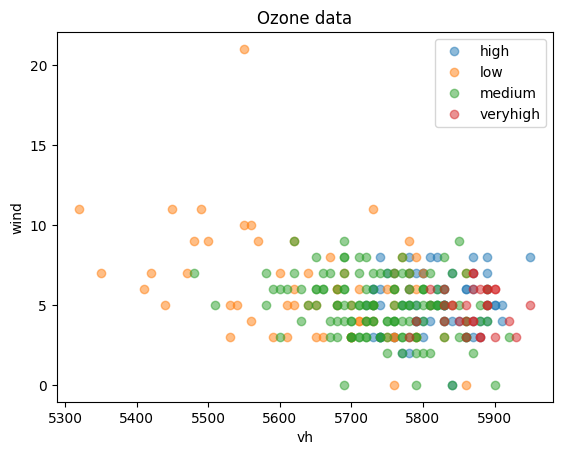

In [47]:
# from ex 2_1_2

i = 0
j = 1

f = plt.figure()
plt.title("Ozone data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.5)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()

In [ ]:
# all combinations

# Calculate the number of combinations
num_combinations = len(cols) * (len(cols) - 1) // 2

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_combinations / 2))
num_cols = 2

# Create a figure with appropriate size
plt.figure(figsize=(15, num_rows * 5))

# Get all combinations of two elements from cols
comb = []
# Iterate over each element in cols
for i in range(len(cols)):
    # Iterate over elements following the current element to avoid repetition
    for j in range(i + 1, len(cols)):
        # Append the pair (i, j) to the combinations list
        comb.append((cols[i], cols[j]))

# Iterate over each combination of i and j
for idx, (i, j) in enumerate(comb, start=1):
    # Create a subplot for the current combination
    plt.subplot(num_rows, num_cols, idx)
    
    # Title for the subplot
    plt.title("PC{} vs PC{}".format(i + 1, j + 1))
    
    # Iterate over each class
    for c in range(C):
        # Select indices belonging to class c
        class_mask = y == c
        plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
    
    # Set labels for x and y axes
    plt.xlabel("PC{}".format(i + 1))
    plt.ylabel("PC{}".format(j + 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


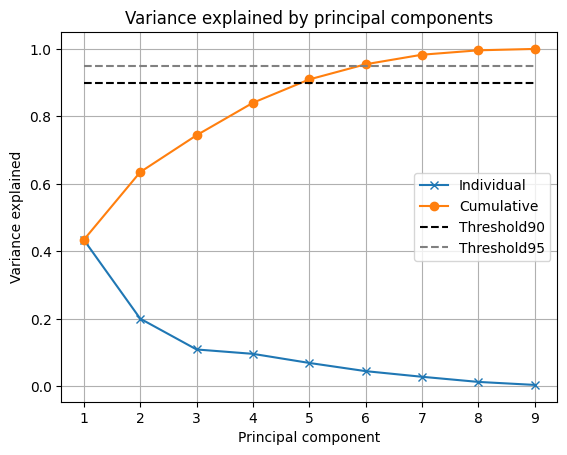

In [48]:
# from exercise 2.1.3

Y = X - np.ones((N, 1)) * X.mean(axis=0)
Y = Y * (1 / np.std(Y, 0))              # important to divide by the stanrdard deviation

U, S, Vh = svd(Y, full_matrices=False)

rho = (S * S) / (S * S).sum()

threshold = 0.9
threshold2 = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.plot([1, len(rho)], [threshold2, threshold2], color="gray", linestyle="--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold90","Threshold95"])
plt.grid()
plt.show()




2700


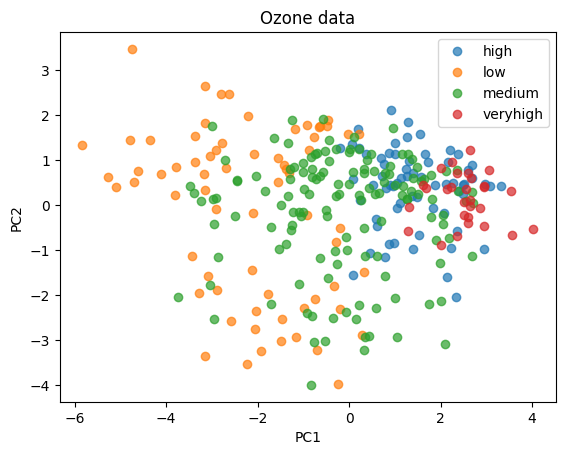

In [49]:
# from exercise 2.1.4

V = Vh.T

Z = Y @ V

i = 0
j = 1

print(Z.size)

# Plot PCA of the data
f = plt.figure()
plt.title("Ozone data")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()



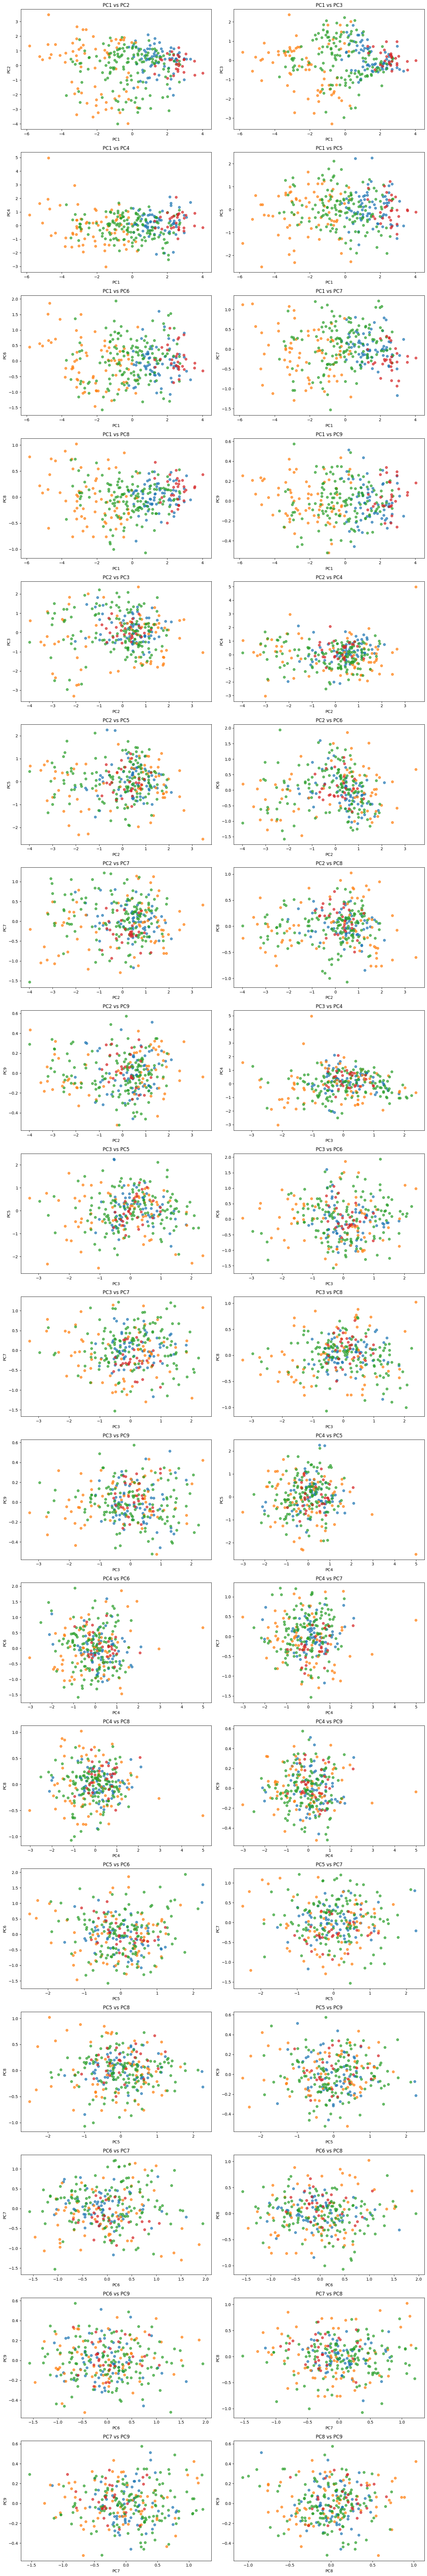

In [50]:
# all combinations

# Calculate the number of combinations
num_combinations = len(cols) * (len(cols) - 1) // 2

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_combinations / 2))
num_cols = 2

# Create a figure with appropriate size
plt.figure(figsize=(15, num_rows * 5))

# Get all combinations of two elements from cols
comb = []
# Iterate over each element in cols
for i in range(len(cols)):
    # Iterate over elements following the current element to avoid repetition
    for j in range(i + 1, len(cols)):
        # Append the pair (i, j) to the combinations list
        comb.append((cols[i], cols[j]))

# Iterate over each combination of i and j
for idx, (i, j) in enumerate(comb, start=1):
    # Create a subplot for the current combination
    plt.subplot(num_rows, num_cols, idx)
    
    # Title for the subplot
    plt.title("PC{} vs PC{}".format(i + 1, j + 1))
    
    # Iterate over each class
    for c in range(C):
        # Select indices belonging to class c
        class_mask = y == c
        plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
    
    # Set labels for x and y axes
    plt.xlabel("PC{}".format(i + 1))
    plt.ylabel("PC{}".format(j + 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


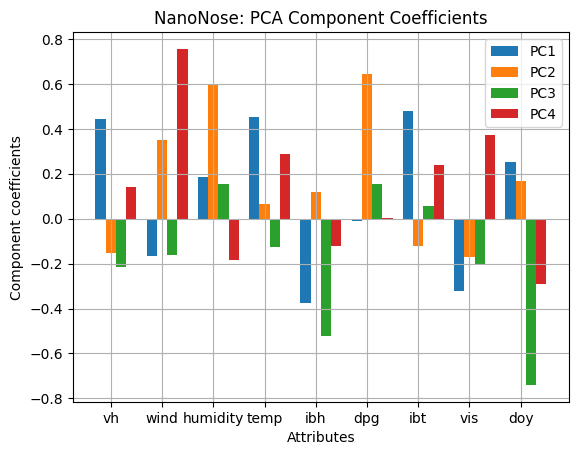

PC2:
vh [-0.15351876]
wind [0.35043155]
humidity [0.59312508]
temp [0.06321161]
ibh [0.12083692]
dpg [0.64188202]
ibt [-0.12058012]
vis [-0.1701044]
doy [0.16657577]



In [51]:
# from exercise 2.2.4

pcs = [0, 1, 2, 3]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("NanoNose: PCA Component Coefficients")
plt.show()

index = 1
print(f"PC{index+1}:")
for i in range(len(attributeNames)):
    print(attributeNames[i], V[[i], index])
print('')




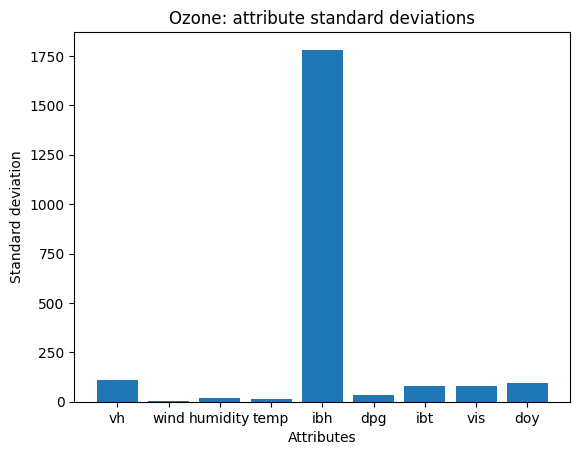

In [52]:
# from ex 2_1_6

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("Ozone: attribute standard deviations")
plt.show()